In [1]:
import cv2 
import pytesseract
import numpy as np
from skimage.io import imread , imshow
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('a.jpg')

In [3]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return angle

In [4]:
deskew(img)

-90.0

In [5]:
deskew

<function __main__.deskew(image)>

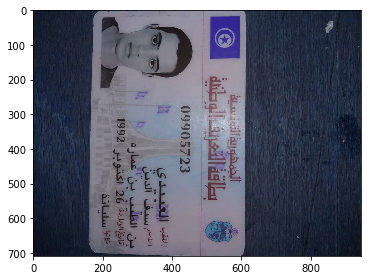

In [6]:
imshow(img)

In [ ]:
def angle (image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]


    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    print(angle)
    
angle(img)
angle

In [ ]:
from imutils.perspective import four_point_transform
import cv2
import numpy

# Load image, grayscale, Gaussian blur, Otsu's threshold
image = cv2.imread("a.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Find contours and sort for largest contour
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
displayCnt = None

for c in cnts:
    # Perform contour approximation
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        displayCnt = approx
        break

# Obtain birds' eye view of image
warped = four_point_transform(image, displayCnt.reshape(4, 2))

angle = detect_angle(warped)
print(angle)


cv2.imshow("thresh", thresh)
cv2.imshow("warped", warped)
cv2.waitKey()

270


In [9]:
def detect_angle(image):
    mask = np.zeros(image.shape, dtype=np.uint8)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3), 0)
    adaptive = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,4)

    cnts = cv2.findContours(adaptive, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    for c in cnts:
        area = cv2.contourArea(c)
        if area < 45000 and area > 20:
            cv2.drawContours(mask, [c], -1, (255,255,255), -1)

    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    h, w = mask.shape
   
    # Horizontal
    if w > h:
        left = mask[0:h, 0:0+w//2]
        right = mask[0:h, w//2:]
        left_pixels = cv2.countNonZero(left)
        right_pixels = cv2.countNonZero(right)
        return 0 if left_pixels >= right_pixels else 180
    # Vertical
    else:
        top = mask[0:h//2, 0:w]
        bottom = mask[h//2:, 0:w]
        top_pixels = cv2.countNonZero(top)
        bottom_pixels = cv2.countNonZero(bottom)
        return 90 if bottom_pixels >= top_pixels else 270

